In [35]:
#Import scikit
#From scikit import svm, randomforest, crossvalidation
#Import xarray
#import numpy

import os
import sys
import csv
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix as cmat
import collections
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as report  
from sklearn.model_selection import *
from sklearn.feature_selection import *
import matplotlib.pyplot as plt
import time
import random
import numpy
from datetime import datetime
import pandas as pd



In [36]:
#Defining a function to get random datetime stamps in a range:

#https://stackoverflow.com/questions/553303/generate-a-random-date-between-two-other-dates
def strTimeProp(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def randomDate(start, end, prop):
    return strTimeProp(start, end, '%m/%d/%Y %I:%M', prop)

In [37]:
#Reading and cleaning nans from a csv files into pandas:

good_data = pd.read_csv("tsoc.csv", parse_dates=True)
good_data = good_data.fillna(0)
good_data
#list(good_data.columns.values)

,depth,date,temp,oxygen,Salinity,Chl
0,0.57,11/3/14 10:00,12.1507,0.000,7.30,0.653
1,1.90,1/20/15 9:40,9.7767,0.000,7.70,0.649
2,1.90,7/6/15 9:58,13.8908,0.000,8.30,2.980
3,1.30,7/20/15 9:25,14.3667,0.000,10.40,27.400
4,0.98,9/8/15 9:18,14.0247,0.000,6.80,2.310
5,0.86,2/1/16 8:55,8.8388,0.000,8.50,0.964
6,1.20,5/2/16 9:49,12.5585,0.000,14.00,19.100
7,1.30,8/15/16 9:33,14.6609,0.000,9.70,12.700
8,1.30,12/19/16 13:28,10.3524,0.000,7.20,0.316
9,1.00,2/2/94 13:44,9.1000,29.368,7.60,2.100


In [38]:
#Getting a 'good' dataset as a set of lists
 
g_depth = good_data['depth'].tolist()
g_date = pd.to_datetime(good_data['date']).tolist()
g_temp = good_data['temp'].tolist()
g_oxygen = good_data['oxygen'].tolist()
g_salinity = good_data['Salinity'].tolist()
g_chl = good_data['Chl'].tolist()

In [39]:
#Generating a random dataset with noise, labeled as bad:

b_depth = []
b_date = []
b_temp = []
b_oxygen = []
b_salinity = []
b_chl = []

for row in range(len(g_depth)):
    #Generate pseudo-random state:
    b_depth.append(float(g_depth[row]) +random.uniform(-5, 5))
    b_date.append(randomDate("03/17/2015 1:30", "11/23/2015 4:50", random.random()))
    b_temp.append(g_temp[row] +random.uniform(-20, 20))
    b_oxygen.append(g_oxygen[row] +random.uniform(-5, 5))
    b_salinity.append(g_salinity[row] +random.uniform(-5, 5))
    b_chl.append(g_chl[row] +random.uniform(-5, 5))

In [6]:
#Join the two sets for training and prediction.

#In this case we will re-read the csv, add a column for labeling, then add the bad data labeled as contrary.

good_data = pd.read_csv("tsoc.csv", parse_dates=[0])
good_data = good_data.fillna(0)
good_data['Label']=1
good_data


,depth,date,temp,oxygen,Salinity,Chl,Label
0,0.57,11/3/14 10:00,12.1507,0.000,7.30,0.653,1
1,1.9,1/20/15 9:40,9.7767,0.000,7.70,0.649,1
2,1.9,7/6/15 9:58,13.8908,0.000,8.30,2.980,1
3,1.3,7/20/15 9:25,14.3667,0.000,10.40,27.400,1
4,0.98,9/8/15 9:18,14.0247,0.000,6.80,2.310,1
5,0.86,2/1/16 8:55,8.8388,0.000,8.50,0.964,1
6,1.2,5/2/16 9:49,12.5585,0.000,14.00,19.100,1
7,1.3,8/15/16 9:33,14.6609,0.000,9.70,12.700,1
8,1.3,12/19/16 13:28,10.3524,0.000,7.20,0.316,1
9,1,2/2/94 13:44,9.1000,29.368,7.60,2.100,1


In [7]:
#Creating bad data DataFrame:
bad_data = pd.DataFrame(columns=list(good_data.columns.values))
bad_data['depth'] = b_depth
bad_data['date'] = b_date
bad_data['temp'] = b_temp
bad_data['oxygen'] = b_oxygen 
bad_data['Salinity'] = b_salinity 
bad_data['Chl'] = b_chl 
bad_data['Label'] = 0 

In [8]:
#Concatenate datas:
full_data = [good_data,bad_data]

full_data = pd.concat(full_data)

In [9]:
#Creating a shuffled DataFrame with new indices:
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data

,depth,date,temp,oxygen,Salinity,Chl,Label
0,55.1097,06/07/2015 08:55,26.078969,0.524094,2.781323,4.037469,0
1,1.1,7/7/10 13:10,14.449800,0.000000,12.900000,20.100000,1
2,52.5341,07/02/2015 04:11,13.013485,26.836730,3.780717,-2.814825,0
3,200,8/7/17 8:52,11.570800,30.284000,5.900000,0.000000,1
4,55.2,12/18/17 13:42,10.005500,0.000000,6.800000,0.000000,1
5,35,5/15/17 8:43,9.227700,0.000000,8.600000,1.220000,1
6,197.177,10/03/2015 09:57,-9.097240,28.895086,3.279909,4.495628,0
7,196.079,10/20/2015 12:11,-4.125454,31.139804,7.913150,1.032148,0
8,50.2747,11/10/2015 02:46,21.093634,32.666478,11.564149,0.853709,0
9,104.219,06/04/2015 07:59,8.861772,0.823758,2.886022,-0.643789,0


In [10]:
#Remove datetime for now:
full_data = full_data.drop(columns=['date'])

#Random Forest need more data treatment to accept the timestamps

In [11]:
#Divide sets between training and validation

divide_point = 800

learn_set = full_data.iloc[divide_point:,:]
predict_set = full_data.iloc[:divide_point,:]


number_of_features = 5

tr_X = learn_set.iloc[:,0:number_of_features]
tr_y = learn_set.iloc[:,number_of_features:number_of_features+1]
tr_y = tr_y.values.ravel()

pr_X = predict_set.iloc[:,0:number_of_features]
pr_y = predict_set.iloc[:,number_of_features:number_of_features+1]
pr_y = pr_y.values.ravel()

In [12]:
#Visualize X set:
tr_X

,depth,temp,oxygen,Salinity,Chl
800,200,11.806700,30.684000,5.500000,0.000000
801,0.897542,13.437512,-4.757888,-2.032983,1.450945
802,101.72,3.239497,-0.180642,9.172523,1.103255
803,99.4,10.655900,0.000000,7.300000,0.000000
804,3.93846,-3.885407,-1.756621,10.997953,2.789454
805,24.6,9.000000,29.203000,7.700000,0.190000
806,98.8,12.509800,0.000000,6.800000,0.000000
807,198,9.211400,29.001000,7.700000,0.000000
808,54.9,9.797600,0.000000,7.600000,0.000000
809,15.3,8.168800,0.000000,8.700000,0.615000


In [13]:
#SVM:

# Train model

svm2 = svm.SVC(C=0.1).fit(tr_X, tr_y)

# Predict 

svm2_pred = svm2.predict(pr_X)   

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[406   0]
 [ 83 311]]
             precision    recall  f1-score   support

 Good Data:       0.83      1.00      0.91       406
  Bad Data:       1.00      0.79      0.88       394

avg / total       0.91      0.90      0.89       800

SVM 10-fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
SVM 10-fold Precision: 1.00 (+/- 0.00)


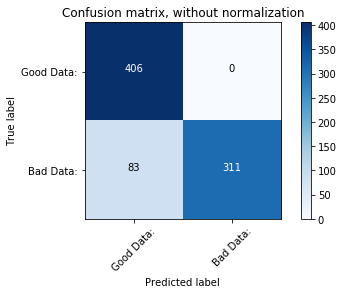

In [17]:
#Results:
target_names = ['Good Data:','Bad Data:']
cnf_matrix = cmat(pr_y, svm2_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='SVM Confusion matrix')


print(report(pr_y, svm2_pred,target_names=target_names))

# Cross Validate

scores = cross_val_score(svm2, pr_X, pr_y, cv=10,scoring='precision')
print("SVM 10-fold:", scores)
print("SVM 10-fold Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Assess prediction

# Visualize Decision boundary ? 

In [18]:
#RF:

rf1 = RandomForestClassifier(n_estimators=250,max_features='log2',\
                             class_weight='balanced_subsample',criterion='entropy',\
                             min_samples_leaf=.0004)

# Train model

rf1_fit = rf1.fit(tr_X, tr_y)

# Predict 

rf1_pred = rf1.predict(pr_X)     #Does not use the backbone information
rf1_result = rf1.score(pr_X,pr_y)

Confusion matrix, without normalization
[[403   3]
 [  1 393]]
Random Forest results report:
             precision    recall  f1-score   support

 Good Data:       1.00      0.99      1.00       406
  Bad Data:       0.99      1.00      0.99       394

avg / total       1.00      0.99      1.00       800

zm RF 10-fold:
RF 10-fold Precision: 0.99 (+/- 0.02)


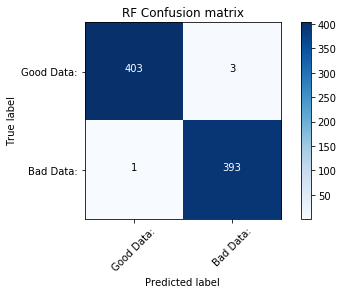

In [19]:
#Results:
cnf_matrix = cmat(pr_y,rf1_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='RF Confusion matrix')

print("Random Forest results report:")
print(report(pr_y, rf1_pred,target_names=target_names))   

# Cross Validate

scores = cross_val_score(rf1, pr_X, pr_y, cv=10,scoring='precision')
print("zm RF 10-fold:"), scores
print("RF 10-fold Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Assess prediction

Text(0.5,1,'Feature importances')

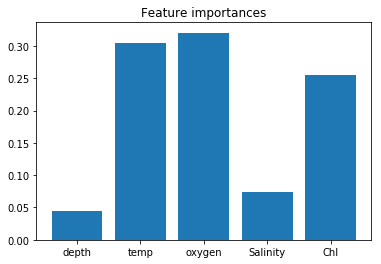

In [20]:
# Visualize feature importance

importances = rf1.feature_importances_
names = ['depth', 'temp', 'oxygen', 'Salinity', 'Chl']

plt.bar(names,importances)
plt.title('Feature importances')
#names

In [21]:
#Import Altair
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

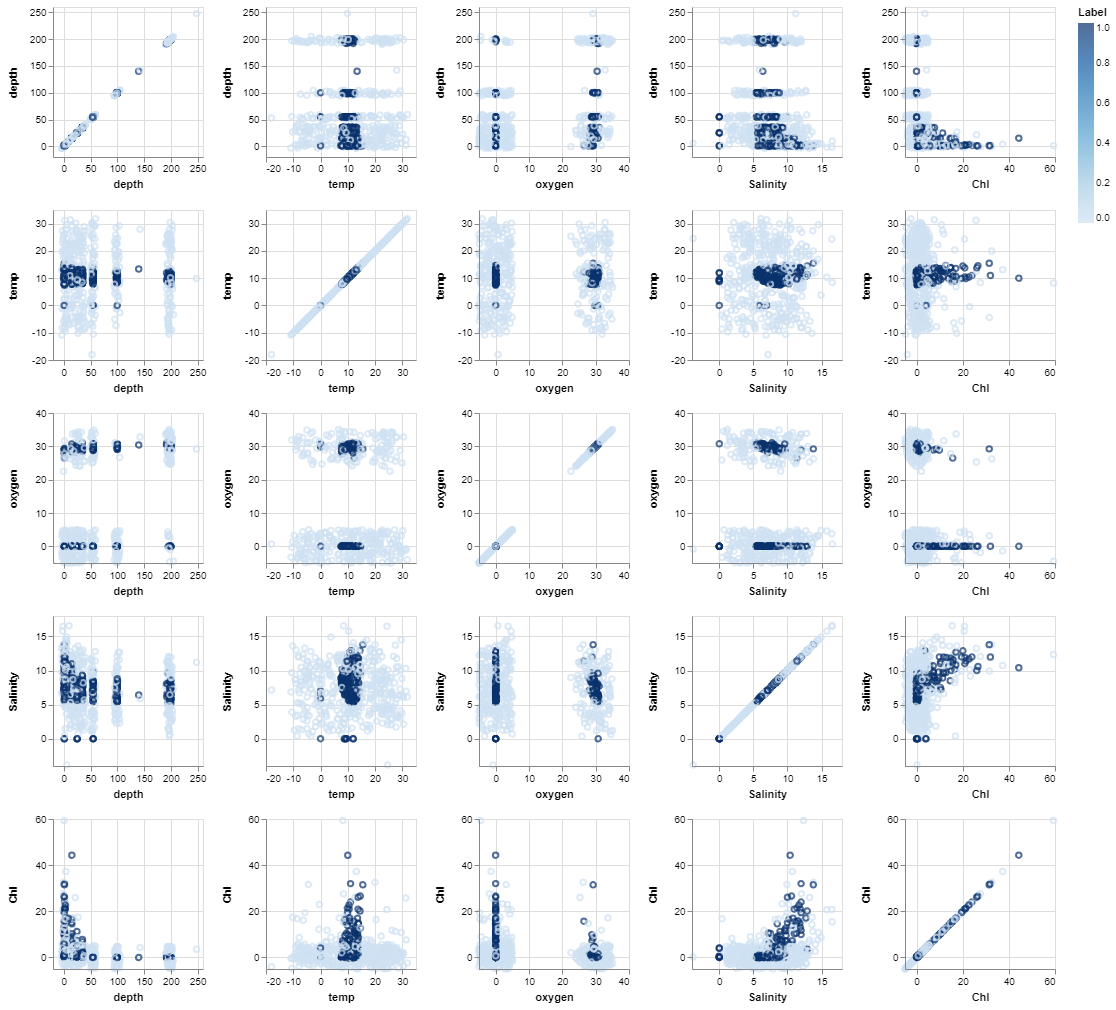

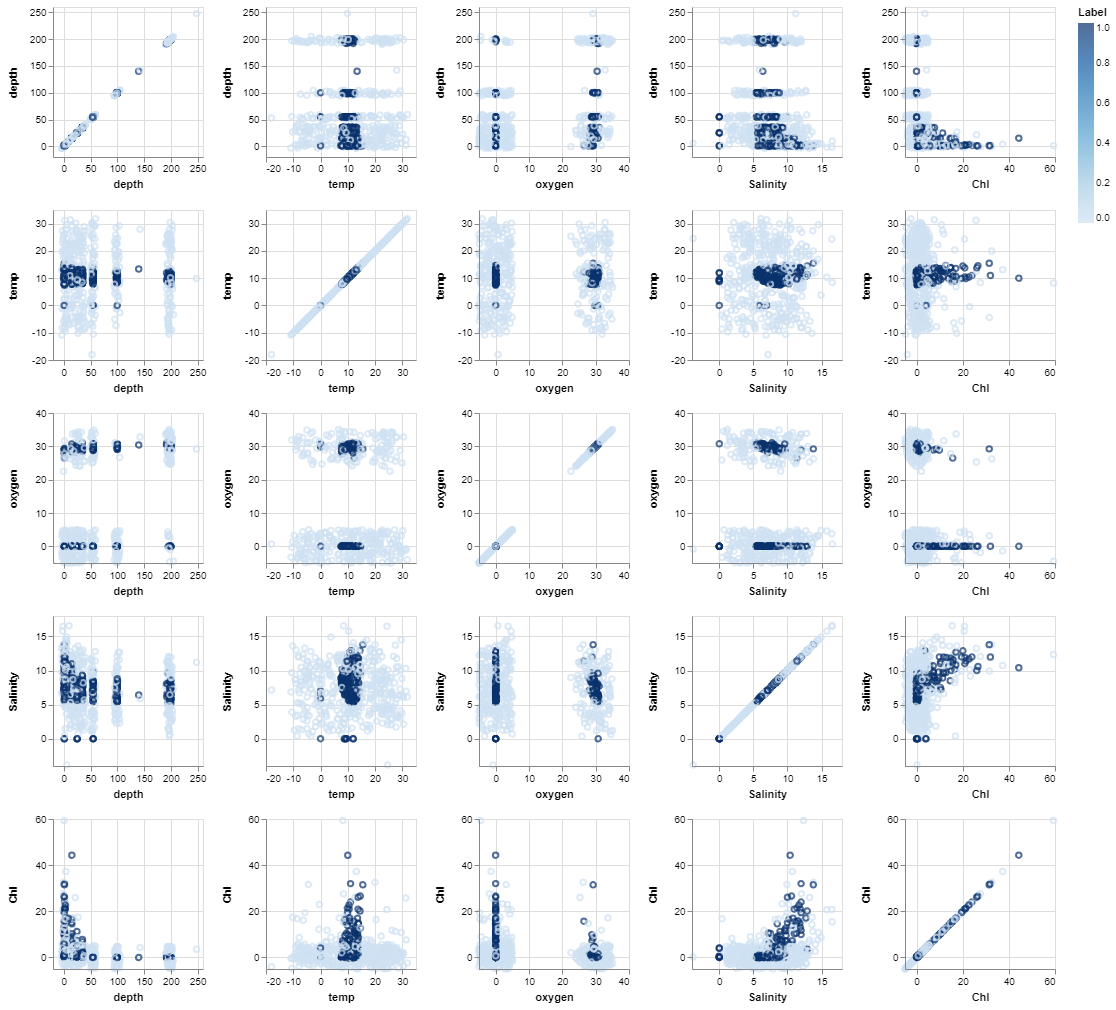

In [22]:
#Data set exploration
alt.Chart(predict_set).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Label'
).properties(
    width=150,
    height=150
).repeat(
    row=['depth', 'temp', 'oxygen','Salinity','Chl'],
    column=['depth', 'temp', 'oxygen','Salinity','Chl'])

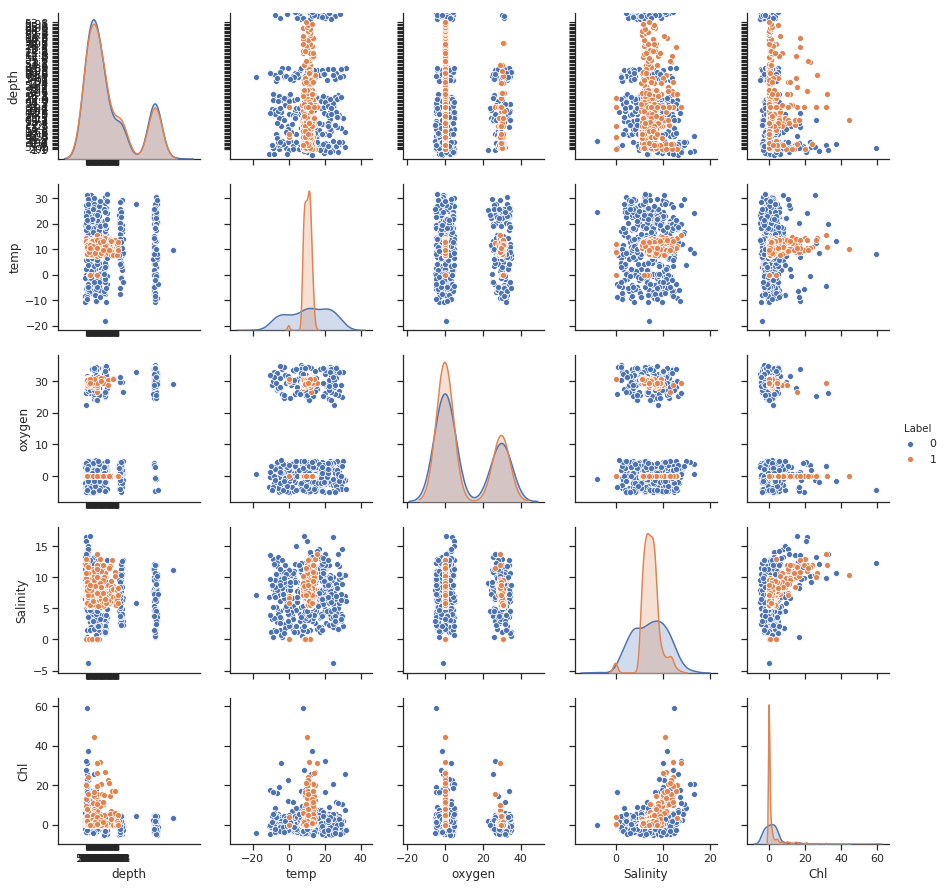

In [31]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(predict_set, hue='Label',vars=['depth', 'temp', 'oxygen','Salinity','Chl'])

In [ ]:
#Further ideas:

# .- Classify origin of data with ML
# .- QC quantifier 
# .- QC corrector/suggestor from ML
